# Example 5.10 (A $T^{2}$-chart for overtime hours)

In [1]:
import pathlib
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def load_data() -> pd.DataFrame:
    fpth = pathlib.Path(r'..\..\data\Table5.8.xlsx')
    return pd.read_excel(fpth)

In [3]:
df = load_data()

In [4]:
# X is n x p = 16 x 2.
X = df.iloc[:, 0:2].to_numpy()
n, p = X.shape

In [5]:
xbar = np.mean(X, axis=0).reshape(p, 1)
S = np.cov(X.T, ddof=1)

In [6]:
alpha = 0.01
crit = stats.chi2(df=p).ppf(q=1-alpha)

In [7]:
Sinv = np.linalg.inv(S)
stat_dist = lambda x: (x.reshape(1,p) - xbar.T) @ Sinv @ (x.reshape(p,1) - xbar)
dist = np.array([stat_dist(X[i,:]).flatten() for i in range(X.shape[0])])

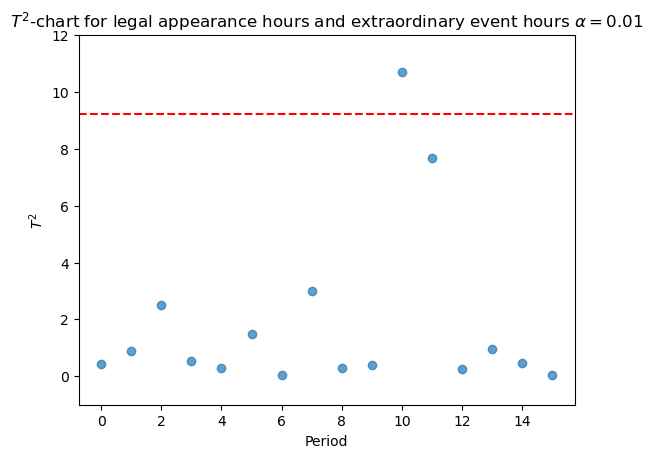

In [8]:

plt.axhline(y=crit, color='r', linestyle='--')
plt.scatter(list(range(dist.shape[0])), dist, alpha=0.70)
plt.ylim([-1, 12])
plt.title(r'$T^{2}$-chart for legal appearance hours and extraordinary event hours $\alpha=0.01$')
plt.xlabel('Period')
plt.ylabel('$T^{2}$')
plt.show()